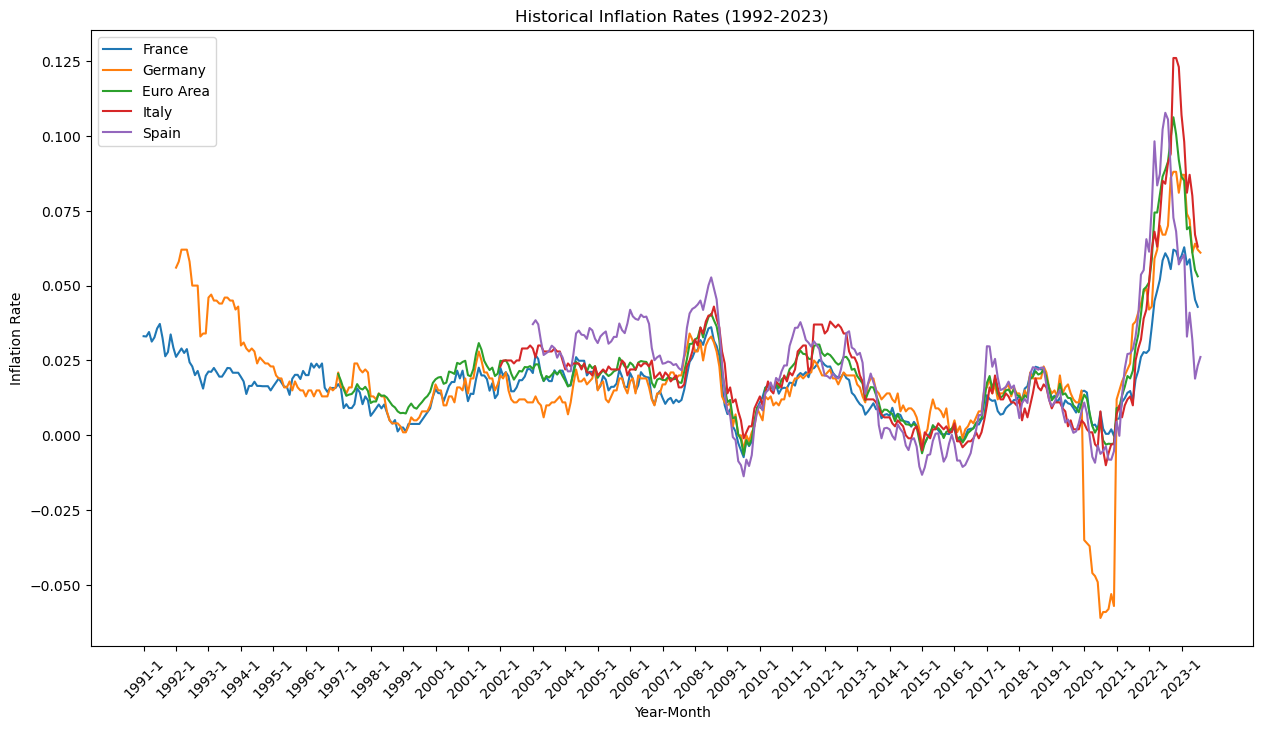

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

germany = pd.read_csv('germany_historical_inflation_1992_to_2023.csv')
france = pd.read_csv('france_historical_inflation_1992_to_2023.csv')
italy = pd.read_csv('italy_historical_inflation_1992_to_2023.csv')
spain = pd.read_csv('spain_historical_inflation_1992_to_2023.csv')
euro_area = pd.read_csv('euro_area_historical_inflation_1992_to_2023.csv')

germany['Country'] = 'Germany'
france['Country'] = 'France'
italy['Country'] = 'Italy'
spain['Country'] = 'Spain'
euro_area['Country'] = 'Euro Area'

all_data = pd.concat([germany, france, italy, spain, euro_area])

all_data = all_data.sort_values(by=['Year', 'Month'])

plt.figure(figsize=(15, 8))

for country in all_data['Country'].unique():
    country_data = all_data[all_data['Country'] == country]
    plt.plot(country_data['Year'].astype(str) + '-' + country_data['Month'].astype(str), country_data['Inflation_Rate'], label=country)

ticks = plt.xticks()[0]
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.xticks(ticks[::12], labels[::12], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Inflation Rate')
plt.title('Historical Inflation Rates (1992-2023)')
plt.legend()
plt.show()


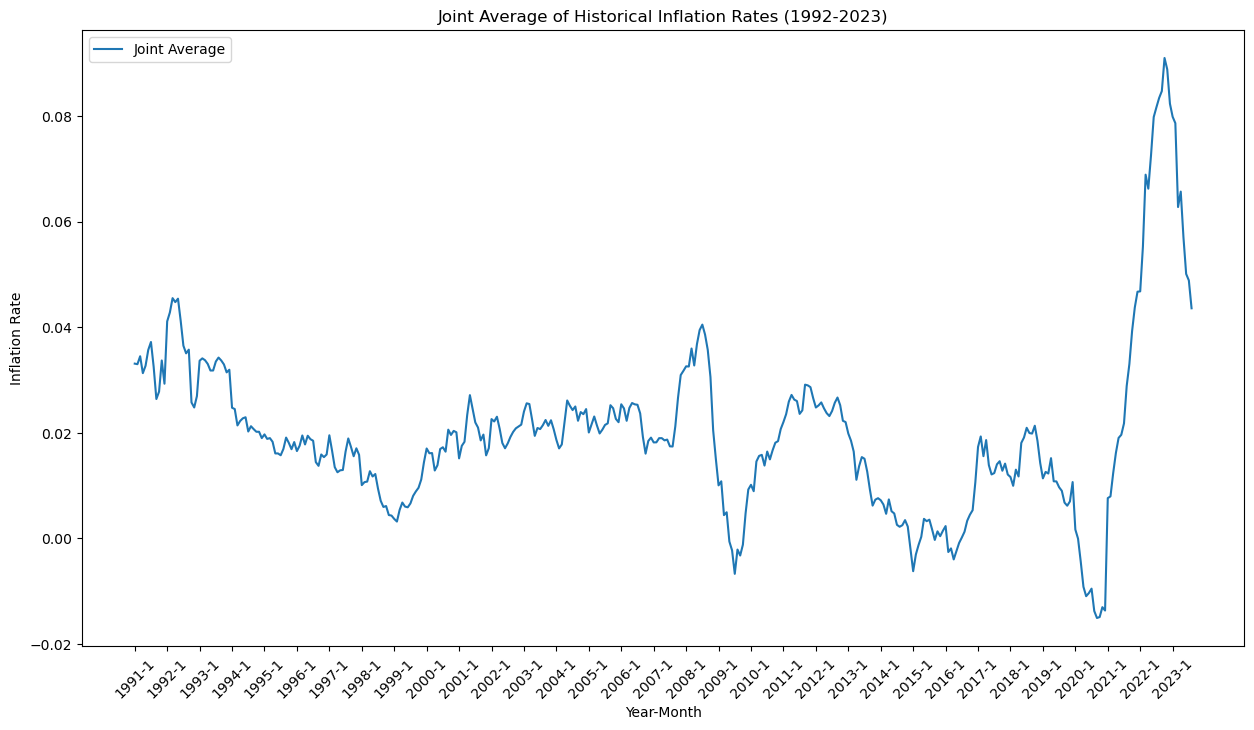

In [58]:
plt.figure(figsize=(15, 8))

joint_only_data = all_data_with_joint[all_data_with_joint['Country'] == 'Joint Average']

plt.plot(joint_only_data['Year'].astype(str) + '-' + joint_only_data['Month'].astype(str), joint_only_data['Inflation_Rate'], label='Joint Average')

ticks = plt.xticks()[0]
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.xticks(ticks[::12], labels[::12], rotation=45)  # Every 12th label is shown

plt.xlabel('Year-Month')
plt.ylabel('Inflation Rate')
plt.title('Joint Average of Historical Inflation Rates (1992-2023)')
plt.legend()
plt.show()



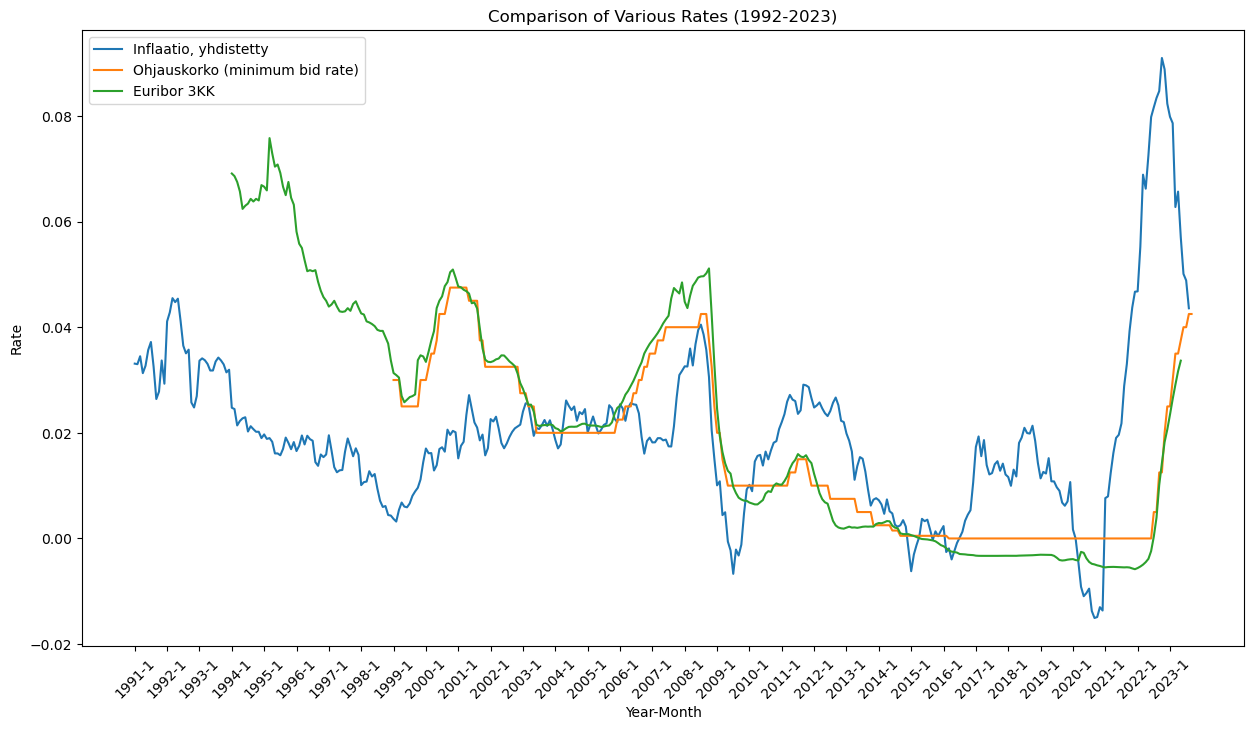

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

ohjauskorot = pd.read_csv('ecb_central_bank_interest_rates_199901_to_202309.csv')
euribor = pd.read_csv('euribor_3mo_historical_close_avg_through_period_31011994_to_31052023.csv')

ohjauskorot.rename(columns={'year': 'Year', 'month': 'Month'}, inplace=True)
euribor.rename(columns={'Year': 'Year', 'Month': 'Month'}, inplace=True)

ohjauskorot['Rate'] = ohjauskorot['Minimum bid rate in the Eurosystem\'s main refinancing operations'] / 100.0
euribor['Rate'] = euribor['Rate'] / 100.0

ohjauskorot = ohjauskorot[['Year', 'Month', 'Rate']]

plt.figure(figsize=(15, 8))

plt.plot(joint_only_data['Year'].astype(str) + '-' + joint_only_data['Month'].astype(str), joint_only_data['Inflation_Rate'], label='Inflaatio, yhdistetty')

plt.plot(ohjauskorot['Year'].astype(str) + '-' + ohjauskorot['Month'].astype(str), ohjauskorot['Rate'], label='Ohjauskorko (minimum bid rate)')
plt.plot(euribor['Year'].astype(str) + '-' + euribor['Month'].astype(str), euribor['Rate'], label='Euribor 3KK')

ticks = plt.xticks()[0]
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.xticks(ticks[::12], labels[::12], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Rate')
plt.title('Comparison of Various Rates (1992-2023)')
plt.legend()
plt.show()


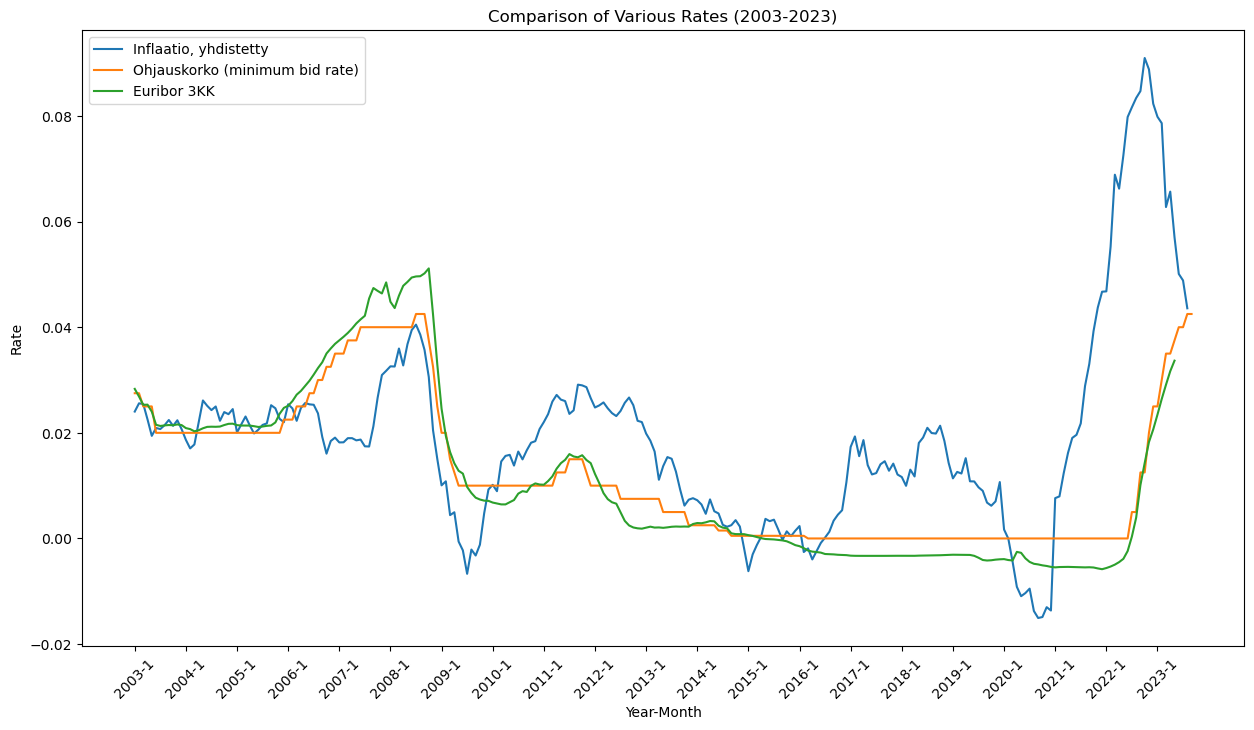

In [88]:
plt.figure(figsize=(15, 8))

joint_only_data_filtered = joint_only_data[(joint_only_data['Year'] >= 2003)]
ohjauskorot_filtered = ohjauskorot[(ohjauskorot['Year'] >= 2003)]
euribor_filtered = euribor[(euribor['Year'] >= 2003)]

plt.plot(joint_only_data_filtered['Year'].astype(str) + '-' + joint_only_data_filtered['Month'].astype(str), 
         joint_only_data_filtered['Inflation_Rate'], label='Inflaatio, yhdistetty')

plt.plot(ohjauskorot_filtered['Year'].astype(str) + '-' + ohjauskorot_filtered['Month'].astype(str), 
         ohjauskorot_filtered['Rate'], label='Ohjauskorko (minimum bid rate)')

plt.plot(euribor_filtered['Year'].astype(str) + '-' + euribor_filtered['Month'].astype(str), 
         euribor_filtered['Rate'], label='Euribor 3KK')

ticks = plt.xticks()[0]
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.xticks(ticks[::12], labels[::12], rotation=45)

plt.xlabel('Year-Month')
plt.ylabel('Rate')
plt.title('Comparison of Various Rates (2003-2023)')
plt.legend()
plt.show()
